# Name: Uthsavi KP

# Task 3:Prediction using Decision Tree Algorithm


#### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
#### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset
df = pd.read_csv("Iris.csv")

In [3]:
# Displaying the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Displaying last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Displaying the information of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Dropping the Id columns as it does not porive us any information
df = df.drop(['Id'],axis=1)

In [9]:
# Dividing the data into attributes and labels
X = df.drop(['Species'],axis=1)
y = df['Species']

In [10]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


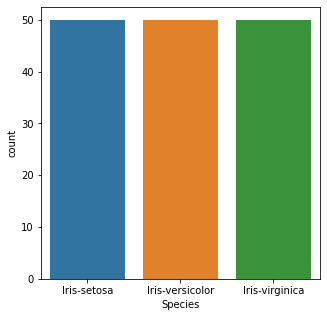

In [11]:
# Using seaborn to to display the countplot
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot('Species',data=df)

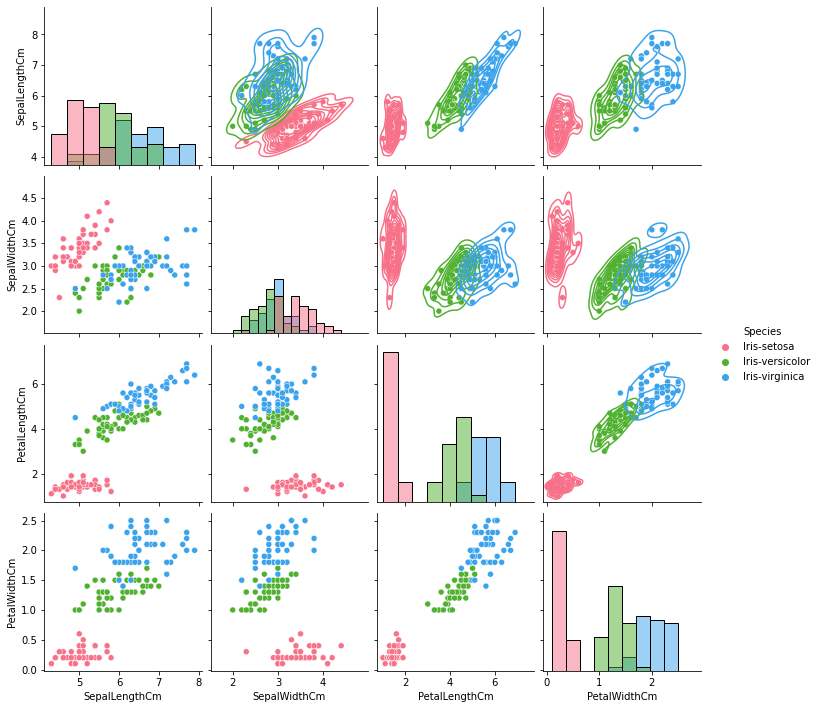

In [12]:
# Visualizing the relationship between each variable using seaborn
plot = sns.pairplot(df, hue ='Species', diag_kind= 'hist', palette='husl')
plot.map_upper(sns.kdeplot, cmap='prism')


In [13]:
# Diving the data into attibutes and labels
X = df.drop(['Species'],axis=1)
y = df['Species']

In [14]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
 X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Train Test Split

In [16]:
# Splitting the data into traing and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=555)

In [17]:
y_train.value_counts()

Iris-versicolor    44
Iris-setosa        39
Iris-virginica     37
Name: Species, dtype: int64

In [18]:
y_test.value_counts()

Iris-virginica     13
Iris-setosa        11
Iris-versicolor     6
Name: Species, dtype: int64

In [19]:
!pwd

/content


# Building the model

## Classifier 1

In [20]:
# Importing the Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

#Creat decision tree classifier object with max depth 2 and gini
clf1 = DecisionTreeClassifier(criterion="gini",max_depth=2)

#Train decision tree classifier
clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test = clf1.predict(X_test)

#Predict the response for train dataset
y_pred_train = clf1.predict(X_train)

from sklearn import metrics
from sklearn.metrics import classification_report

#Model accuracy, how often the classifier is correct?
print("Train accuracy:",metrics.accuracy_score(y_train,y_pred_train))

#Model accuracy, how often the classifier is correct?
print("Test accuaracy:",metrics.accuracy_score(y_test,y_pred_test))

Train accuracy: 0.975
Test accuaracy: 0.9


In [21]:
# Displaying the Classification report
print(classification_report(y_test,y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.67      1.00      0.80         6
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



## Classifier 2

In [22]:
#Creat decision tree classifier object with max depth 3 and entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf2.fit(X_train,y_train)
y_pred_train1 = clf2.predict(X_train)
y_pred_test1 = clf2.predict(X_test)

#Model accuracy, how often the classifier is correct?
print("Train accuracy:",metrics.accuracy_score(y_train,y_pred_train1))
print("Test accuaracy:",metrics.accuracy_score(y_test,y_pred_test1))

Train accuracy: 0.9833333333333333
Test accuaracy: 0.9333333333333333


In [23]:
# Displaying the classification report
print(classification_report(y_test,y_pred_test1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.75      1.00      0.86         6
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



## Classifier 3

In [24]:
#Creat decision tree classifier object with max depth 4 and entropy
clf3 = DecisionTreeClassifier(criterion="entropy",max_depth=4)
clf3.fit(X_train,y_train)
y_pred_train2 = clf3.predict(X_train)
y_pred_test2 = clf3.predict(X_test)

#Model accuracy, how often the classifier is correct?
print("Train accuracy:",metrics.accuracy_score(y_train,y_pred_train2))
print("Test accuaracy:",metrics.accuracy_score(y_test,y_pred_test2))

Train accuracy: 1.0
Test accuaracy: 0.9


In [25]:
# Displaying the classification report
print(classification_report(y_test,y_pred_test2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.67      1.00      0.80         6
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



Looking at classifier clf3, it is clearly visible that the decision tree classifier with max_depth 4 is overfitting.
Classifer clf2 with  max depth 3 has good accuracy and recall.
So I am selecting clf2.

# **Graphical Representation of Tree**

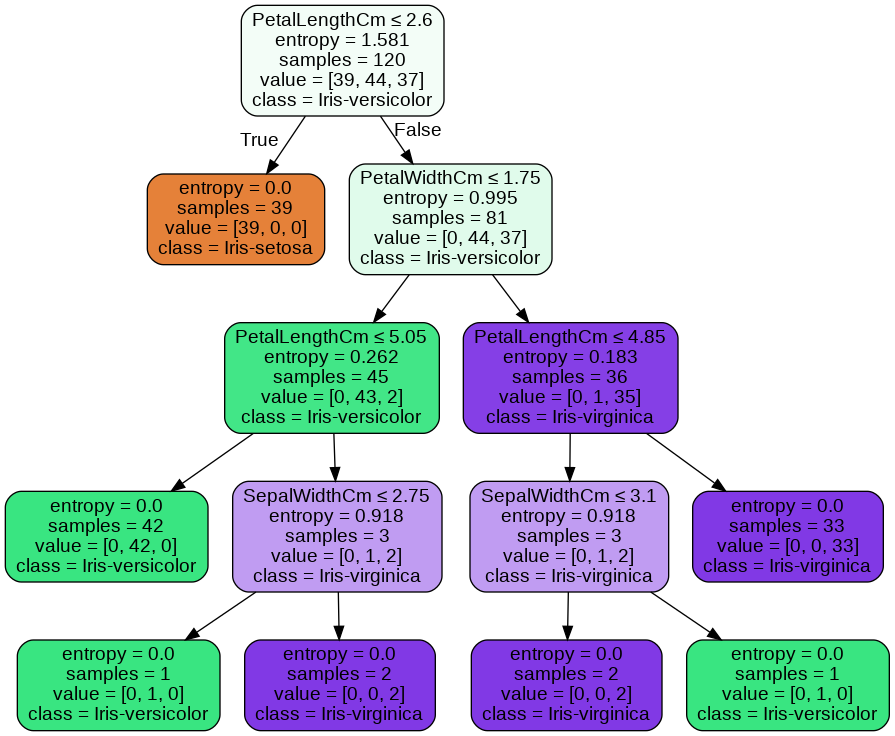

In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
